# ANKIT KUMAR - ML - Data Preprocessing Outlier Detection and Feature Engineering

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tasks:
# Load and Explore the Dataset:

In [2]:
#Load Dataset
df=pd.read_csv(r'D:\Downloads\swedish_insurance.csv')

In [3]:
#First 10 rows of the dataset
df.head(10)

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [5]:
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


Visualize the data using box plots and scatter plots.

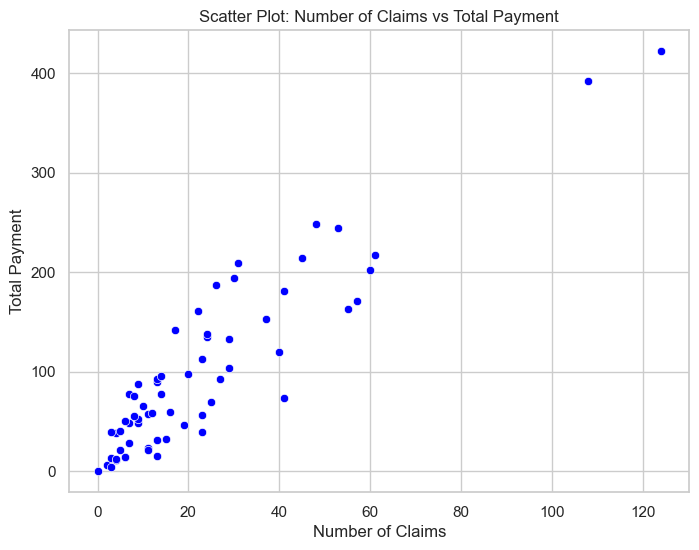

In [12]:
# Scatter Plot: Number of Claims vs Total Payment
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='X', y='Y', color='blue')
plt.title('Scatter Plot: Number of Claims vs Total Payment')
plt.xlabel('Number of Claims')
plt.ylabel('Total Payment')
plt.show()


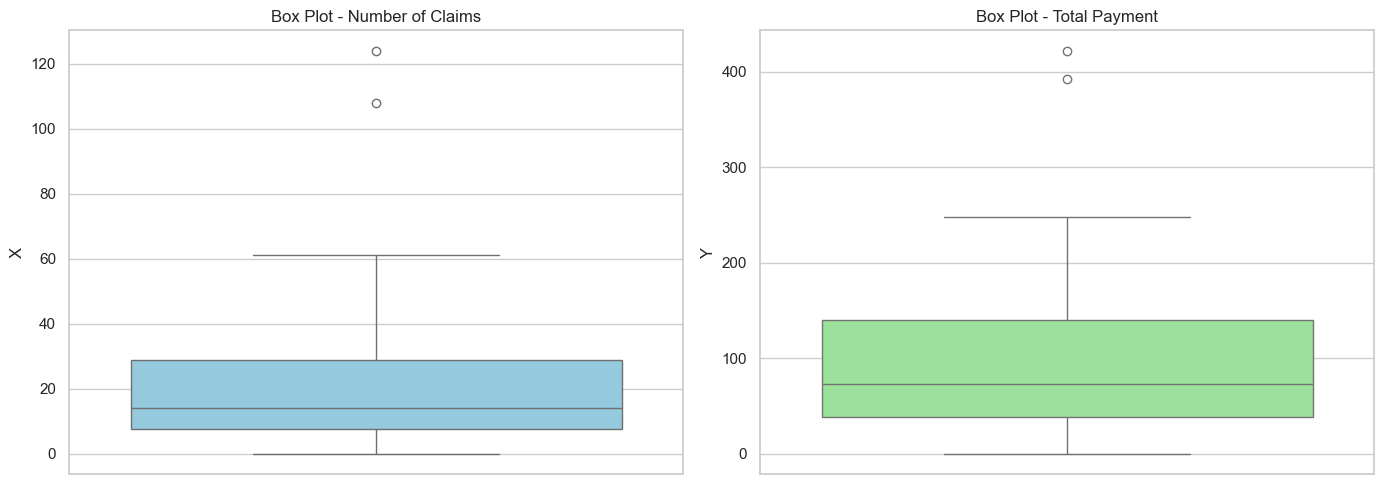

In [15]:
# Box Plots for both columns
plt.figure(figsize=(14, 5))

# Box plot for Claims
plt.subplot(1, 2, 1)
sns.boxplot(y=df['X'], color='skyblue')
plt.title('Box Plot - Number of Claims')

# Box plot for Payments
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Y'], color='lightgreen')
plt.title('Box Plot - Total Payment')

plt.tight_layout()
plt.show()

# Calculate Statistical Properties:

>Calculate the mean and variance for both the number of claims (X) and the total payment (Y).

In [18]:
# Extract X and Y values
X = df['X']
Y = df['Y']

#  Calculate Mean
mean_X = X.mean()
mean_Y = Y.mean()

print(f" Mean of X (Claims): {mean_X}")
print(f" Mean of Y (Payments): {mean_Y}")

#  Calculate Variance
var_X = X.var()
var_Y = Y.var()

print(f" Variance of X (Claims): {var_X}")
print(f" Variance of Y (Payments): {var_Y}")

 Mean of X (Claims): 22.904761904761905
 Mean of Y (Payments): 98.18730158730159
 Variance of X (Claims): 545.3133640552995
 Variance of Y (Payments): 7626.101449052739


>Write code to calculate covariance between X and Y.

In [22]:
#  Calculate Covariance
cov_XY = (lambda x, y: ((x - x.mean()) * (y - y.mean())).sum() / (len(x) - 1))(X, Y)
print(f" Covariance between X and Y: {cov_XY}")


 Covariance between X and Y: 1861.6036098310294


# Estimate Coefficients:
>Estimate the coefficients b0 and b1 for the simple linear regression model using the calculated mean, variance, and covariance.

In [24]:
# Estimate coefficients
b1 = cov_XY / var_X
b0 = mean_Y - b1 * mean_X

# Output
print(f" Estimated Coefficients:")
print(f" Slope (b1): {b1}")
print(f" Intercept (b0): {b0}")

 Estimated Coefficients:
 Slope (b1): 3.413823560066367
 Intercept (b0): 19.99448575911481


# Make Predictions:
>Use the estimated coefficients to make predictions (Y_hat) for the dataset.


In [26]:
Y_hat = b0 + b1 * X

>Compare the predicted values (Y_hat) with the actual values (Y).

In [32]:
#  Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Y': Y,
    'Predicted Y': Y_hat})

# Display the first 10 comparisons
print(" Actual vs Predicted Values:")
comparison_df.head(10)

 Actual vs Predicted Values:


,Actual Y,Predicted Y
0,392.5,388.687430
1,46.2,84.857133
2,15.7,64.374192
3,422.2,443.308607
4,119.4,156.547428
5,170.9,214.582429
6,56.9,98.512428
7,77.5,67.788016
8,214.0,173.616546
9,65.3,54.132721


# Visual Comparison:
>Plot the original data points and the regression line on the same graph to visualize the accuracy of the predictions.

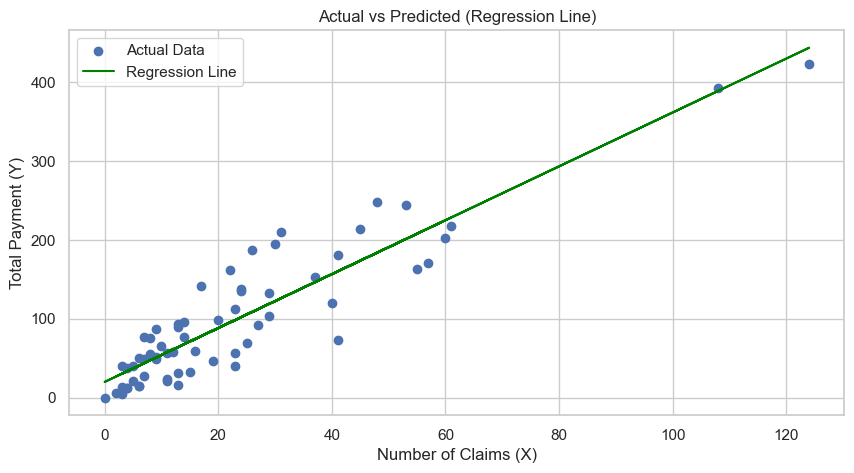

In [42]:
plt.figure(figsize=(10,5 ))

# Scatter plot of actual data
plt.scatter(X, Y, label='Actual Data')

# Regression line
plt.plot(X, Y_hat, color='green', label='Regression Line')

# Labels and title
plt.xlabel('Number of Claims (X)')
plt.ylabel('Total Payment (Y)')
plt.title('Actual vs Predicted (Regression Line)')
plt.legend()

plt.show()

# THE END